# Gender and Mean Suicide Rates in Canada
### Group 11 Project Proposal
##### Group Members: 
Aaron Cui (94952777)
<br>Aditya Goel (84874379)
<br>Jialu Jin (24403594)
<br>Yirui Wang (27719509)

# Introduction


Suicide is a prevelent cause of death in Canada, accounting for 1.2% of all deaths in the year 2020 (Elflein Distribution of deaths Canada by cause 2020). Past research has led us to believe that there may be differences in suicide rates between men and women, therefore we are interested in further studying this phenomenon (cite here). As a result, our research question for this project is: **what were the mean suicide rates of males and females in Canada between 1985 and 2013?** We will be using the Suicide Rates Overview 1985 to 2016 dataset sourced from Kaggle for our analysis, focusing only on the data relevant to Canada. Our response variable will be the number of suicides per 100,000 people, and we have decided to use mean as our location parameter and standard deviation as our scale parameter. 

# Preliminary Results

In [3]:
library(infer)
library(repr)
library(tidyverse)
library(readxl)
library(digest)
library(dplyr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.1
✔ modeldata    1.0.1     ✔ workflows    1.1.0
✔ parsnip      1.0.2     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::f

Demonstrate that the dataset can be read from the web into R.
- We downloaded the dataset from the web and put it in our repository.

In [4]:
Suicide_p <- read.csv("master.csv", header=T)
head(Suicide_p)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


Clean and wrangle the data into a tidy format.
- We cleaned and wrangled the data by filtering only Canada and selecting sex, year and suicides.100k.pop columns.

In [10]:
suicide_sample <- Suicide_p %>%
                  filter(country %in% c("Canada")) %>%
                  select(sex, year, age, suicides.100k.pop)
suicide_sample

sex,year,age,suicides.100k.pop
<chr>,<int>,<chr>,<dbl>
male,1985,75+ years,28.45
male,1985,55-74 years,27.27
male,1985,25-34 years,27.00
⋮,⋮,⋮,⋮
female,2013,75+ years,4.61
female,2013,5-14 years,1.10
male,2013,5-14 years,0.78


Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- We plot a boxplot of number of suicides per 100k population for different sex.
- We also plot a histogram of Sample distribution of number of suicides per 100k population in Canada for 2 sex groups.
- From the boxplot, we can see that the boxplots of two genders don't even overlap. Also, from the histogram, the sample distribution varies a lot for different genders. So we think this might indicate that there is a difference of the mean number of suicides per 100k population for two genders.

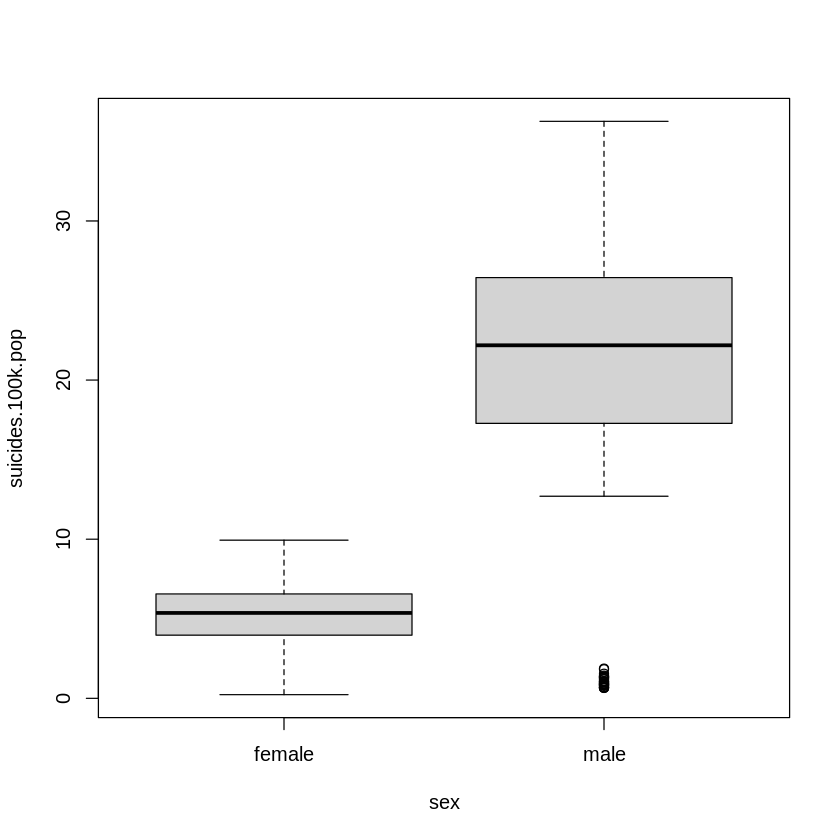

In [11]:
boxplot(suicides.100k.pop ~ sex, data = suicide_sample)

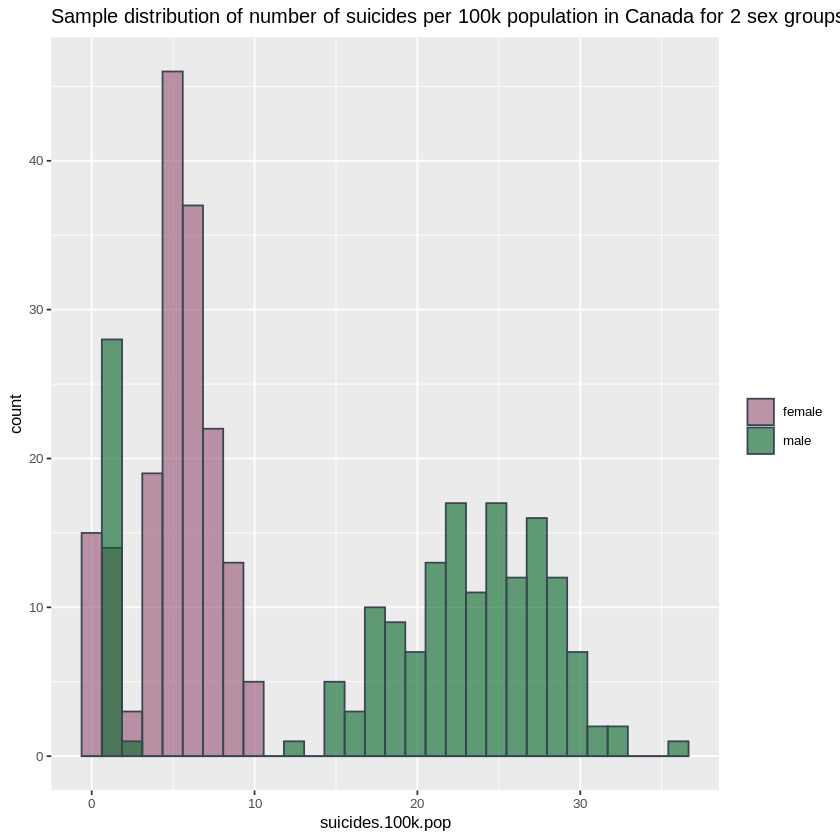

In [12]:
histogram <- suicide_sample %>%
    ggplot(aes(x = suicides.100k.pop, fill = sex)) +
    geom_histogram(bins=30, color="#374652", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#985473", "#036425")) +
    ggtitle("Sample distribution of number of suicides per 100k population in Canada for 2 sex groups")+
    labs(fill="") +
    theme(text = element_text(size = 10))
histogram

Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
- The following is the summary statistics(sample means of number of suicides per 100k population for female and male respectively)

In [13]:
summary <- suicide_sample%>%
        group_by(sex) %>%
        summarize(mean = mean(suicides.100k.pop))
summary

sex,mean
<chr>,<dbl>
female,5.113161
male,19.822011


As we can clearly notice from the priliminary data summary, the mean suicide rates of males are clearly higher than those of women.

# Methods: Plan

This report compares the differences of suicide rate in Canada from 1985 and 2013, it focuses on the gender and has a wide time period ranging from 1985 to 2013. This report analyzes data by using both bootstrapping and asymptotic methods. It’s trustworthy because the hypothesis is tested in a straightforward way of deriving estimates. Plus, the sample we are using is relatively large so the result we get will be reliable. However, if we don’t use the bootstrapping method and the asymptotic analysis to verify the hypothesis, the result we get would be susceptible to outliers or other facts.

# References

Rusty. “Suicide Rates Overview 1985 to 2016e.” Kaggle, 1 Dec. 2018, https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016.   

Freeman, Aislinné et al. “A Cross-National Study on Gender Differences in Suicide Intent - BMC Psychiatry.” BioMed Central, BioMed Central, 29 June 2017, https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-017-1398-8.  

Elflein, John. “Distribution of Deaths Canada by Cause 2020.” Statista, 4 Mar. 2022, https://www.statista.com/statistics/437880/proportion-of-deaths-in-canada-by-disease/#:~:text=However%2C%20the%20leading%20causes%20of,43.9%20percent%20of%20all%20deaths.   
